In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("engine_data.csv")

In [ ]:
data.head()

,Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp,Engine_Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_rpm        19535 non-null  int64  
 1   Lub_oil_pressure  19535 non-null  float64
 2   Fuel_pressure     19535 non-null  float64
 3   Coolant_pressure  19535 non-null  float64
 4   lub_oil_temp      19535 non-null  float64
 5   Coolant_temp      19535 non-null  float64
 6   Engine_Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [ ]:
data.isnull().sum()

,0
Engine_rpm,0
Lub_oil_pressure,0
Fuel_pressure,0
Coolant_pressure,0
lub_oil_temp,0
Coolant_temp,0
Engine_Condition,0


In [ ]:
data.describe()

,Engine_rpm,Lub_oil_pressure,Fuel_pressure,Coolant_pressure,lub_oil_temp,Coolant_temp,Engine_Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


Text(0.5, 1.0, 'Engine Coolant temperature v/s Engine maintainence')

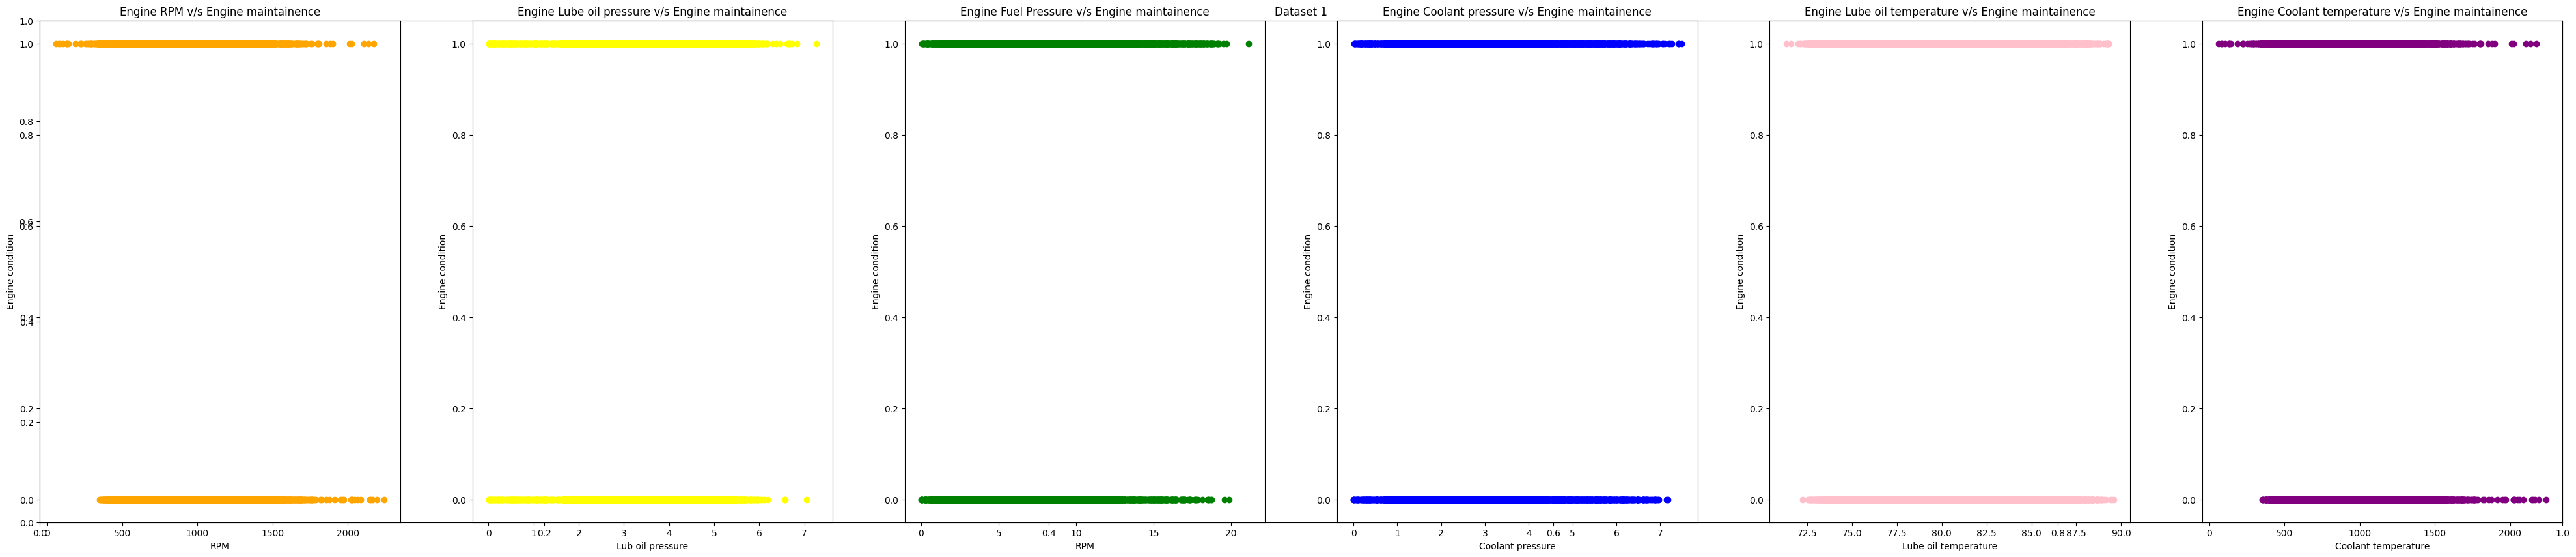

In [ ]:
plt.figure(figsize=(50, 10))
plt.title("Dataset 1")

# RPM v/s Maintainence
plt.subplot(1, 6, 1)
plt.scatter(data['Engine_rpm'], data['Engine_Condition'],color="orange", label="Data points")
plt.xlabel("RPM")
plt.ylabel("Engine condition")
plt.title("Engine RPM v/s Engine maintainence")

# LUB OIL PRESSURE v/s Maintainence
plt.subplot(1, 6, 2)
plt.scatter(data['Lub_oil_pressure'], data['Engine_Condition'],color="yellow", label="Data points")
plt.xlabel("Lub oil pressure")
plt.ylabel("Engine condition")
plt.title("Engine Lube oil pressure v/s Engine maintainence")

# Fuel Pressure v/s Maintainence
plt.subplot(1, 6, 3)
plt.scatter(data['Fuel_pressure'], data['Engine_Condition'],color="green", label="Data points")
plt.xlabel("RPM")
plt.ylabel("Engine condition")
plt.title("Engine Fuel Pressure v/s Engine maintainence")

# Coolant Pressure v/s Maintainence
plt.subplot(1, 6, 4)
plt.scatter(data['Coolant_pressure'], data['Engine_Condition'],color="blue", label="Data points")
plt.xlabel("Coolant pressure")
plt.ylabel("Engine condition")
plt.title("Engine Coolant pressure v/s Engine maintainence")

# Lube oil temperature v/s Maintainence
plt.subplot(1, 6, 5)
plt.scatter(data['lub_oil_temp'], data['Engine_Condition'],color="pink", label="Data points")
plt.xlabel("Lube oil temperature")
plt.ylabel("Engine condition")
plt.title("Engine Lube oil temperature v/s Engine maintainence")

# Coolant temperature v/s Maintainence
plt.subplot(1, 6, 6)
plt.scatter(data['Engine_rpm'], data['Engine_Condition'],color="purple", label="Data points")
plt.xlabel("Coolant temperature")
plt.ylabel("Engine condition")
plt.title("Engine Coolant temperature v/s Engine maintainence")

In [ ]:
data.duplicated().sum()

0

Text(0.5, 1.0, 'Correlation Map')

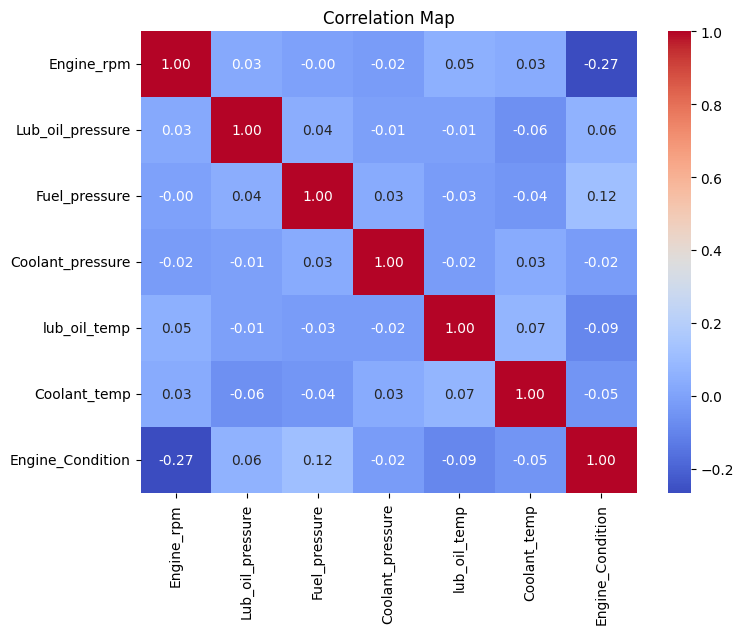

In [ ]:
import seaborn as sns

data_corr = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Map")

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in split.split(data, data['Engine_Condition']):
  strat_train_set = data.loc[train_indices]
  strat_test_set = data.loc[test_indices]

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15628 entries, 16957 to 9964
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_rpm        15628 non-null  int64  
 1   Lub_oil_pressure  15628 non-null  float64
 2   Fuel_pressure     15628 non-null  float64
 3   Coolant_pressure  15628 non-null  float64
 4   lub_oil_temp      15628 non-null  float64
 5   Coolant_temp      15628 non-null  float64
 6   Engine_Condition  15628 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 976.8 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Engine_Condition'], axis = 1)
y = strat_train_set['Engine_Condition']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=24)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

RFCmodel2 = rfc.fit(x_train, y_train)

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.6458733205374281
              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1141
           1       0.70      0.78      0.74      1985

    accuracy                           0.65      3126
   macro avg       0.61      0.59      0.60      3126
weighted avg       0.63      0.65      0.63      3126



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(128, input_dim=6, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7545 - loss: 0.5001 - val_accuracy: 0.6437 - val_loss: 0.6667
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7488 - loss: 0.5088 - val_accuracy: 0.6377 - val_loss: 0.6779
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7601 - loss: 0.4904 - val_accuracy: 0.6297 - val_loss: 0.6842
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7602 - loss: 0.4917 - val_accuracy: 0.6357 - val_loss: 0.6703
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7561 - loss: 0.4884 - val_accuracy: 0.6381 - val_loss: 0.6792
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7588 - loss: 0.4858 - val_accuracy: 0.6345 - val_loss: 0.6886
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7563 - loss: 0.4857 - val_accuracy: 0.6333 - val_loss: 0.6849
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7631 - loss: 0.4775 - val_accuracy: 0.

In [78]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")

model.save("RFCModel2.h5")

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6121 - loss: 1.0022


Test Accuracy: 0.6113243699073792


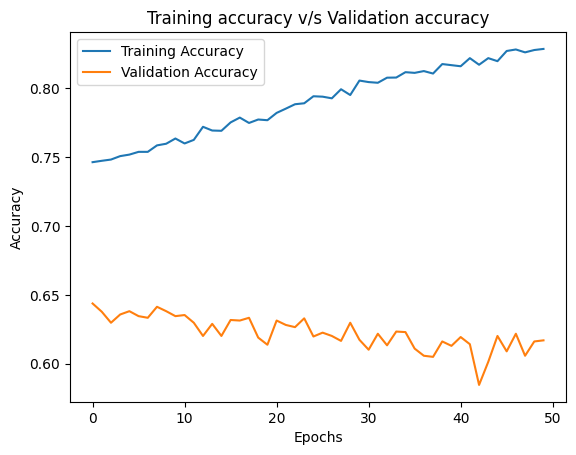

In [ ]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy v/s Validation accuracy")
plt.legend()
plt.show()

In [ ]:
import pickle as pk

with open("DNNmodel1.pkl", 'wb') as file:
  pk.dump(history, file)

In [ ]:
# idk why this doesnt work
import pickle as pk

with open("RFCModel2.pkl", 'wb') as file:
  pk.dump(RFCmodel2, file)